In [1]:
#importation des package necessaire
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
print("tous les packages sont bien importé")

tous les packages sont bien importé


In [3]:
#Charger les données IRIS 
data = datasets.load_iris()
X, y = sklearn.utils.shuffle(data.data, data.target, random_state=0) # Mélanger les données
print("Dimensions du base de données iris ", X.shape ,"\ndimension de la variable cible", y.shape)

Dimensions du base de données iris  (150, 4) 
dimension de la variable cible (150,)


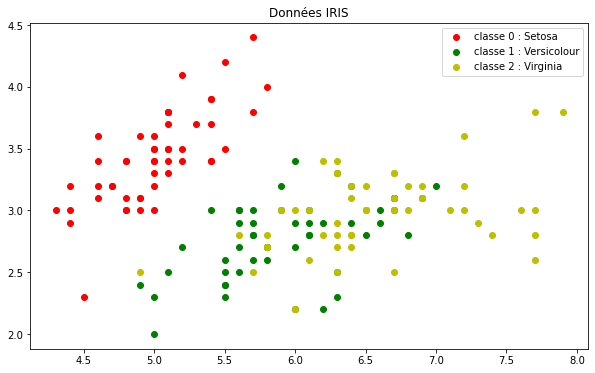

<Figure size 432x288 with 0 Axes>

In [9]:
#Visualisation des données IRIS 
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c = 'r', label = 'classe 0 : Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c = 'g', label = 'classe 1 : Versicolour')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], c = 'y', label = 'classe 2 : Virginia')
plt.title('Données IRIS')
plt.legend()
plt.show()
plt.savefig('IRIS.png')

In [11]:
#Fonction d'activation softmax  
def softmax(x):
    for i in range(x.shape[0]):
        x[i] = np.exp(x[i])/np.sum(np.exp(x[i]))
    return x

#Encodage One-Hot de la variable cible Y
def Encodage_One_Hot(y):
    Encodage_OneHot  = np.zeros([y.shape[0], 3])
    for row in range(y.shape[0]):
        if y[row] == 0:
            Encodage_OneHot[row]=[1,0,0]
        if y[row] == 1:
            Encodage_OneHot[row]=[0,1,0]
        if y[row] == 2:
            Encodage_OneHot[row]=[0,0,1]
    return Encodage_OneHot


In [12]:
#Ajouter la colonne du biais dans la matrice X des entrées
x = np.ones([X.shape[0],X.shape[1]+1])
x[:, 1:] = X
x

array([[1. , 5.8, 2.8, 5.1, 2.4],
       [1. , 6. , 2.2, 4. , 1. ],
       [1. , 5.5, 4.2, 1.4, 0.2],
       [1. , 7.3, 2.9, 6.3, 1.8],
       [1. , 5. , 3.4, 1.5, 0.2],
       [1. , 6.3, 3.3, 6. , 2.5],
       [1. , 5. , 3.5, 1.3, 0.3],
       [1. , 6.7, 3.1, 4.7, 1.5],
       [1. , 6.8, 2.8, 4.8, 1.4],
       [1. , 6.1, 2.8, 4. , 1.3],
       [1. , 6.1, 2.6, 5.6, 1.4],
       [1. , 6.4, 3.2, 4.5, 1.5],
       [1. , 6.1, 2.8, 4.7, 1.2],
       [1. , 6.5, 2.8, 4.6, 1.5],
       [1. , 6.1, 2.9, 4.7, 1.4],
       [1. , 4.9, 3.6, 1.4, 0.1],
       [1. , 6. , 2.9, 4.5, 1.5],
       [1. , 5.5, 2.6, 4.4, 1.2],
       [1. , 4.8, 3. , 1.4, 0.3],
       [1. , 5.4, 3.9, 1.3, 0.4],
       [1. , 5.6, 2.8, 4.9, 2. ],
       [1. , 5.6, 3. , 4.5, 1.5],
       [1. , 4.8, 3.4, 1.9, 0.2],
       [1. , 4.4, 2.9, 1.4, 0.2],
       [1. , 6.2, 2.8, 4.8, 1.8],
       [1. , 4.6, 3.6, 1. , 0.2],
       [1. , 5.1, 3.8, 1.9, 0.4],
       [1. , 6.2, 2.9, 4.3, 1.3],
       [1. , 5. , 2.3, 3.3, 1. ],
       [1. , 5

In [13]:
#Prendre les 120 lignes premieres comme données d'entrainement
training_data = x[:120, :]
#On va tester le modele par le rest des données
test_data = x[120:, :]

In [14]:
#Encodage One-Hot
training_label = Encodage_One_Hot(y[:120])
test_label = Encodage_One_Hot(y[120:])

In [15]:
print(training_label)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0.

In [17]:
#Modéle du regression logistique softmax
np.random.seed(0) #Fixer les données aleatoires
w = abs(np.random.randn(5, 3)/10)
JW_b = []
epochs = 30
i = 0
#while(True):
for j in range(120):
    z = np.dot(training_data, w)
    D = -1.0*training_label*np.log(softmax(z))
    D = D.sum(axis = 1)#Erreur de chaque iteration
    JW_b.append(D.sum(axis = 0)/120.0)
    gradient = np.dot(training_data.T, (softmax(z)-training_label))*1.0/120.0 #Calcul du gradient
    w = w - 0.1*gradient # les nouveaux poids
    i = i+1

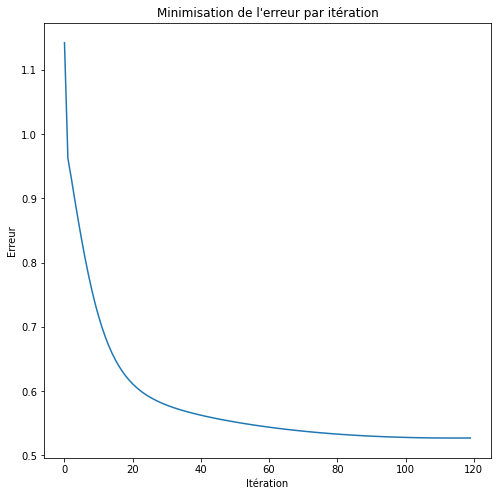

In [18]:
#Graphe des erreurs 
plt.figure(figsize=(8,8))
plt.plot(JW_b)
plt.ylabel("Erreur")
plt.xlabel("Itération")
plt.title("Minimisation de l'erreur par itération")
plt.show()

In [20]:
#Tester le modéle
l = np.dot(test_data, w)
predicted_label = np.argmax(l, axis = 1)

In [29]:
print(l)

[[  6.57856997   1.60940777  -4.17449295]
 [-31.01339026  17.44013289  19.75215819]
 [  3.87776719   2.17789667  -2.34874017]
 [  1.76459079   2.7753007   -1.10185343]
 [-27.54008174  15.87031399  17.56229601]
 [  3.25481365   2.38513922  -2.07747461]
 [-24.68179607  13.81685086  16.23620616]
 [-15.5548647   10.07313723  10.02830411]
 [-14.44519421   9.72664866   9.25048877]
 [-12.05041038   8.75727918   7.65528234]
 [-23.2938853   13.35783943  15.2605376 ]
 [-23.19108789  13.52170891  15.10226013]
 [-21.11122431  12.65230655  13.46174297]
 [-20.62835983  12.67748358  13.26398453]
 [  1.31185163   3.16207007  -0.90740505]
 [-13.78397839   9.31315613   8.74734384]
 [-25.37788038  14.36933569  16.54709487]
 [-22.80523051  12.86627712  14.8048268 ]
 [  3.01052451   2.55300052  -1.91805367]
 [-17.74969102  11.57530559  11.29117012]
 [-15.03422325   9.79704474   9.75699116]
 [-19.4762457   11.6346265   12.74504989]
 [-18.40424905  11.62575265  11.63025103]
 [  4.53469851   2.21817747  -2.93

In [28]:
print(predicted_label)

[0 2 0 1 2 0 2 1 1 1 2 2 2 2 1 1 2 2 0 1 1 2 2 0 0 1 2 1 2 0]


In [22]:
td = test_data[:, 1:] # Eviter la colonne du biais
tl = np.argmax(test_label, axis = 1)

In [33]:
print(test_label)

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


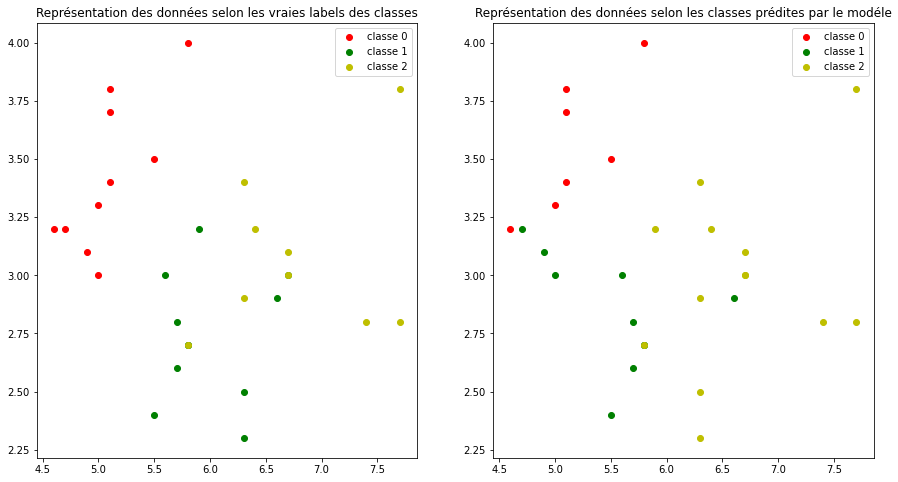

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

#plt.subplot(1,2,1)
ax1.scatter(td[tl == 0][:, 0], td[tl == 0][:, 1], c = 'r', label = 'classe 0')
ax1.scatter(td[tl == 1][:, 0], td[tl == 1][:, 1], c = 'g', label = 'classe 1')
ax1.scatter(td[tl == 2][:, 0], td[tl == 2][:, 1], c = 'y', label = 'classe 2')
ax1.set_title("Représentation des données selon les vraies labels des classes")
ax1.legend(loc='upper right')

#ax1.subplot(1,2,2)
ax2.scatter(td[predected_label == 0][:, 0], td[predicted_label == 0][:, 1], c = 'r', label = 'classe 0')
ax2.scatter(td[predected_label == 1][:, 0], td[predicted_label == 1][:, 1], c = 'g', label = 'classe 1')
ax2.scatter(td[predected_label == 2][:, 0], td[predicted_label == 2][:, 1], c = 'y', label = 'classe 2')
ax2.set_title("Représentation des données selon les classes prédites par le modéle")
ax2.legend(loc='upper right')
plt.show()